### Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from LDA import LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import seaborn as sns


# KNN

### Import the data

In [40]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [41]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

### Scale the data

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### LDA

In [45]:
#our LDA
clf = LDA(n_components=4)
clf.fit(X_train, y_train)
lda_transformed_X_train= clf.transform(X_train)
lda_transformed_X_test = clf.transform(X_test)

print(X_test.shape, lda_transformed_X_train.shape)

(5000, 784) (10000, 4)


In [46]:
# Transform data
transformed_X_train= clf.transform(X_train)

# Transform to pandas data frame
d = {'LDA1': lda_transformed_X_train[:,0], 'LDA2': lda_transformed_X_train[:,2], 'LDA3': lda_transformed_X_train[:,2], 'LDA4': lda_transformed_X_train[:,3]}
lda_transformed_X_train = pd.DataFrame(d)

In [47]:
# Transform data
transformed_X_test= clf.transform(X_test)

# Transform to pandas data frame
d = {'LDA1': transformed_X_test[:,0], 'LDA2': lda_transformed_X_test[:,2], 'LDA3': lda_transformed_X_test[:,2], 'LDA4': lda_transformed_X_test[:,3]}
lda_transformed_X_test = pd.DataFrame(d)

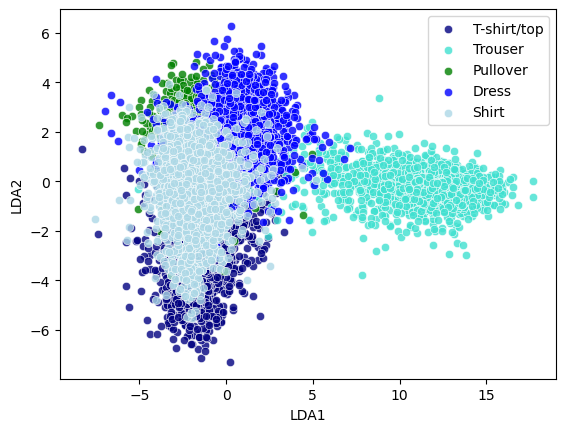

In [48]:
fig, ax = plt.subplots()

colors = colors = ["navy", "turquoise", "green", 'blue', 'lightblue']
components = ['LDA1', 'LDA2', 'LDA3', 'LDA4']
class_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}

for k, c in enumerate(colors):
    sns.scatterplot(data=lda_transformed_X_train[y_train== k], x='LDA1', y='LDA2', alpha=0.8, color=c, label=class_dict[k], ax=ax)

plt.savefig('lda_sklearn_plot.png')

### PCA 

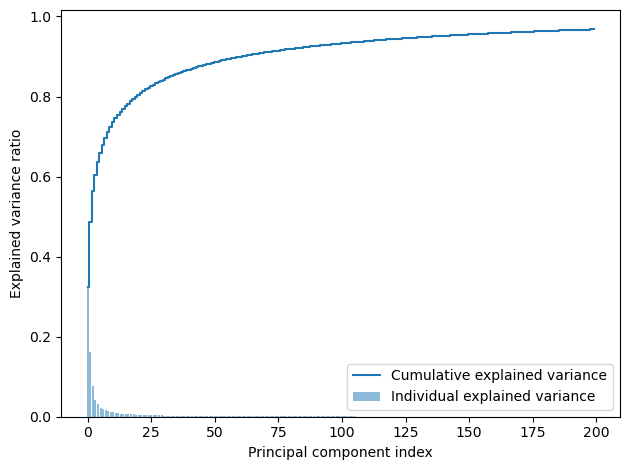

In [30]:
#PCA using sklearn
pca = PCA(n_components= 200)
pca_transformed_X_train= pca.fit_transform(X_train, y_train)
pca_X_test_transformed = pca.transform(X_test)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("explained_variance_ratio_pca.png")
plt.show()

In [11]:
pca = PCA(0.90).fit(X_train)
pca.n_components_

62

since 112 components explain 90% of the data 2we set the components = 112

In [12]:
pca = PCA(n_components= 112)
pca_transformed_X_train= pca.fit_transform(X_train, y_train)
pca_X_test_transformed = pca.transform(X_test)

In [13]:

def KNN_accuracy(X_train,y_train,X_test,y_test):
    """
    returns accuracy of KNN classifier

    Inputs:
    - X_train: Training data features (numpy array or pandas DataFrame)
    - y_train: Training data labels (numpy array or pandas Series)
    - X_test: Testing data features (numpy array or pandas DataFrame)
    - y_test: Testing data labels (numpy array or pandas Series)

    Output:
    - accuracy_score: the accuracy of the KNN classifier on the test data.
    It is calculated as the ratio of correctly predicted instances to the total number of instances.(float)


    """
    neigh = KNeighborsClassifier(n_neighbors=21)
    neigh.fit(X_train, y_train)
    predictions = (neigh.predict(X_test))

    accuracy_score = np.sum(predictions== y_test)/len(y_test)
    return accuracy_score



### Cross validation

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate

In [ ]:
#our LDA
clf = LDA(n_components=4)
clf.fit(X_train, y_train)
lda_transformed_X_train= clf.transform(X_train)
lda_transformed_X_test = clf.transform(X_test)

print(X_test.shape, lda_transformed_X_train.shape)

In [63]:
n_values = [1,3,5,7,9,1,13,15]

In [79]:
pca_model = make_pipeline(LinearDiscriminantAnalysis(n_components=4), KNeighborsClassifier(n_neighbors=11) )
cv_result = cross_validate(pca_model, X_train,y_train , cv=5)
cv_result

{'fit_time': array([2.22483778, 2.23965883, 2.24496174, 2.08827519, 2.04643202]),
 'score_time': array([0.13755703, 0.13635898, 0.13271809, 0.13185692, 0.15252495]),
 'test_score': array([0.819 , 0.816 , 0.817 , 0.814 , 0.8105])}

In [80]:
lda_model = make_pipeline(PCA(n_components=100), KNeighborsClassifier(n_neighbors=23) )
cv_result = cross_validate(lda_model, X_train,y_train , cv=5)
cv_result

{'fit_time': array([2.40167093, 2.22988486, 2.54354405, 2.13373899, 2.42627311]),
 'score_time': array([0.16028404, 0.15750098, 0.15154505, 0.15062022, 0.15246797]),
 'test_score': array([0.8235, 0.818 , 0.8175, 0.8135, 0.814 ])}

In [83]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=23) )
cv_result = cross_validate(model, X_train,y_train , cv=5)
cv_result

{'fit_time': array([0.11918497, 0.08858395, 0.080338  , 0.07766604, 0.08233404]),
 'score_time': array([0.85853291, 0.91484404, 0.77855396, 0.74580622, 0.75853014]),
 'test_score': array([0.8305, 0.8225, 0.82  , 0.824 , 0.822 ])}

In [162]:
n_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 25, 27]
cv = 5

def cross_val_plot(X, y, n_values, cv, method):
    """ plot the different cross-validation scores from each split
    input:
    X: 
    y:
    n(list): number of neighbors
    cv (int): number of splits
    method: 'lda', 'pca', 'standard', or None
    
    output: accuracy score for each split
    """
    all_results = []

    for n in n_values:
        if method == 'lda':
            model = make_pipeline(LinearDiscriminantAnalysis(n_components=4), KNeighborsClassifier(n_neighbors=n))
        elif method == 'pca':
            model = make_pipeline(PCA(n_components=100), KNeighborsClassifier(n_neighbors=n))
        elif method == 'standard':
            model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
        else:
            model = KNeighborsClassifier(n_neighbors=n)

        cv_result = cross_validate(model, X, y, cv=cv)
        all_results.append(cv_result['test_score'])

    return all_results
    # # Plotting
    # print(all_results)
    # plt.plot(n_values, all_results, marker='none')
    # plt.title('Cross-Validation Scores for Different n_neighbors')
    # plt.xlabel('n_neighbors')
    # plt.ylabel('Mean Accuracy')
    # plt.show()




In [146]:
standard_cv_plot = cross_val_plot(X_train, y_train, n_values, cv, 'standard')
pca_cv_plot = cross_val_plot(X_train, y_train, n_values, cv, 'pca')
lda_cv_plot = cross_val_plot(X_train, y_train, n_values, cv, 'lda')

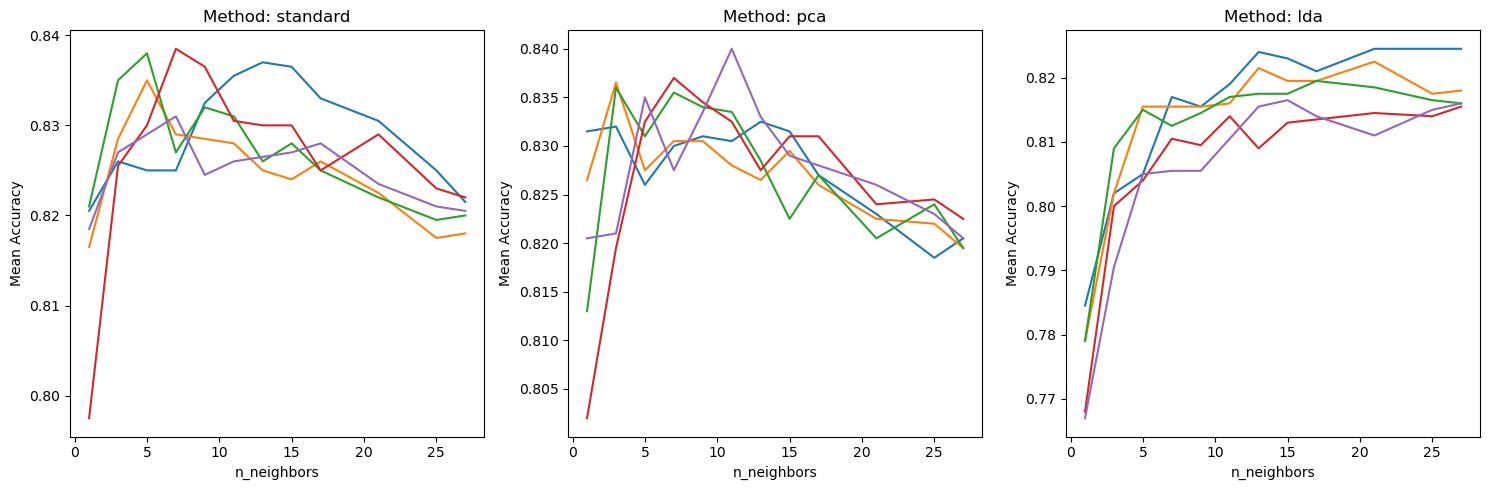

In [152]:
data_set =[standard_cv_plot,pca_cv_plot,lda_cv_plot]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

Methods =['standard','pca','lda']
for i in range(len(data_set)):
    axes[i].plot(n_values, data_set[i], marker='none')
    axes[i].set_title(f'Method: {Methods[i]}')
    axes[i].set_xlabel('n_neighbors')
    axes[i].set_ylabel('Mean Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

In [163]:
def cross_val_mean(X, y, n, cv, method):
    """
    Calculates the mean score from each split in the cross-validation.

    input:
    X:
    y:
    n_values (list): List of number of neighbors to be tested
    cv (int): Number of splits
    method (str): 'lda', 'pca', 'standard', or 'default'

    output: mean score from each split
    """

    if method == 'lda':
        model = make_pipeline(LinearDiscriminantAnalysis(n_components=4), KNeighborsClassifier(n_neighbors=n))
    elif method == 'pca':
        model = make_pipeline(PCA(n_components=100), KNeighborsClassifier(n_neighbors=n))
    elif method == 'standard':
        model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    else:
        model = KNeighborsClassifier(n_neighbors=n)

    cv_result = cross_validate(model, X, y, cv=cv)
    cv_result = cv_result['test_score']

    return np.mean(cv_result)  # Return the mean score



In [164]:
n_values=[1,3,5,7,9,11,13,15,17,21,25]

In [165]:
pca_all_scores = [cross_val_mean(X_train, y_train, n, cv, 'pca') for n in n_values]
lda_all_scores = [cross_val_mean(X_train, y_train, n, cv, 'lda') for n in n_values]
standard_all_scores = [cross_val_mean(X_train, y_train, n, cv, 'standard') for n in n_values]


In [157]:
data_set =[pca_all_scores,lda_all_scores, standard_all_scores]

cross validating for diferent number of n neighbours on the different datasets

In [166]:
#seting number of neighbours and number of splits in the cross validation
n_values = [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23]
cv = 5

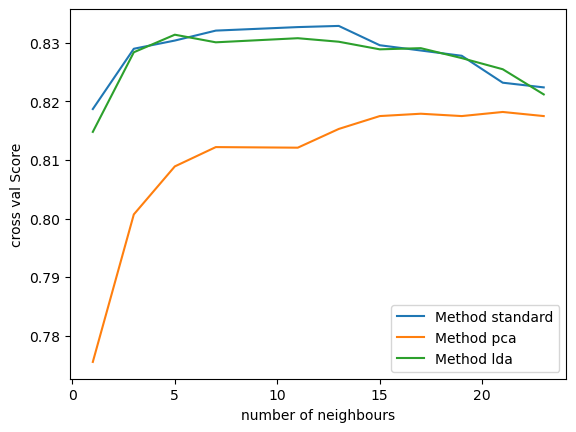

In [168]:
# Create a figure and axis
fig, ax = plt.subplots()

Methods =['standard','pca','lda']
# Plot each set of scores
for i, scores in enumerate(data_set):
    label = f'Method {Methods[i]}'  # You can customize the labels
    ax.plot(n_values,scores, label=label)

# Add labels and legend
ax.set_xlabel('number of neighbours')
ax.set_ylabel('cross val Score')
ax.legend()

# Show the plot
plt.show()


investigating LDA further

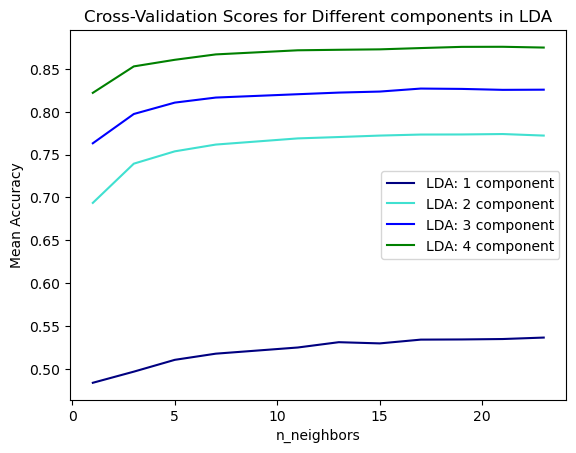

In [22]:
def cross_val_plot_lda(data_sets, n_values, cv):
    """
    plots the different accuracy scores for each split for different number of 
    neighbours for LDA datasets with different number of components

    inputs: 
    data_sets:
    n_values (list): number of neighbours
    cv (int) number of splits
    
    output: cross validation scores plotted
    """
    Methods = ['1 component', '2 component', '3 component','4 component']
    colors = ['navy', 'turquoise', 'blue','green']
    for i, (X_train, y_train) in enumerate(data_sets):
        method_name = Methods[i]
        all_scores = [cross_val_mean(X_train, y_train, n, cv) for n in n_values]
        plt.plot(n_values, all_scores, marker='none', label=f'LDA: {method_name}',color=colors[i])

    # Plotting
    plt.title('Cross-Validation Scores for Different components in LDA')
    plt.xlabel('n_neighbors')
    plt.ylabel('Mean Accuracy')
    plt.legend()
    plt.savefig('cross_val_diff_lda_plot.png')
    plt.show()

data_sets = [(lda_multi(1)), (lda_multi(2)), (lda_multi(3)),(lda_multi(4))]

cross_val_plot_lda(data_sets,n_values,cv=5)


### Train final classifier

In [ ]:
# Train and apply LDA
lda = LDA(n_components=4)
lda.fit(X_train, y_train)
lda_transformed_X_train = lda.transform(X_train)
lda_transformed_X_test = lda.transform(X_test)

In [50]:


# KNN
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(lda_transformed_X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [51]:
yhat = knn.predict(lda_transformed_X_test)
yhat_proba = knn.predict_proba(lda_transformed_X_test)

### Test

In [52]:
accuracy_score(y_test, yhat)

0.7644

In [53]:
_confusion_matrix=confusion_matrix(y_test, yhat)
_confusion_matrix

array([[799,   1,  34,  51, 115],
       [ 10, 950,   6,  29,   5],
       [ 37,   1, 745,  93, 124],
       [ 35,  10, 154, 728,  73],
       [171,   4, 141,  84, 600]])

In [54]:
test_scores = {'Class':[], 'Recall': [], 'Precision': []}

for i in range(5):
    TP = _confusion_matrix[i,i]
    FP = sum(_confusion_matrix[:,i])-TP
    FN = sum(_confusion_matrix[i,:])-TP
    TN = np.sum(_confusion_matrix)- TP-FP-FN

    test_scores['Class'].append(i)

    # Recall: TP/(TP+FN)
    test_scores['Recall'].append(TP/(TP+FN))
    # Precision: TP/(TP+FP)
    test_scores['Precision'].append(TP/(TP+FP))

In [55]:
test_scores_df = pd.DataFrame(test_scores)
test_scores_df

,Class,Recall,Precision
0,0,0.799,0.759506
1,1,0.950,0.983437
2,2,0.745,0.689815
3,3,0.728,0.739086
4,4,0.600,0.654308
